## 學習在模型開始前檢查各個環節

是否有 GPU 資源

將前處理轉為函式，統一處理訓練、驗證與測試集

將超參數變數化，易於重複使用函式、模型等

In [2]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
# 通常預設路徑會在 C:\Program Files\NVIDIA Corporation\NVSMI，之後再輸入 nvidia-smi 就可以看到詳情了
nvidia-smi

In [1]:
import os
import tensorflow.keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tensorflow.keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tensorflow.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tensorflow.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tensorflow.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tensorflow.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = tensorflow.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 48us/sample - loss: 1.9100 - accuracy: 0.3130 - val_loss: 1.7551 - val_accuracy: 0.3716
Epoch 2/100
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7058 - accuracy: 0.3889 - val_loss: 1.6443 - val_accuracy: 0.4099
Epoch 3/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.6061 - accuracy: 0.4271 - val_loss: 1.5479 - val_accuracy: 0.4482
Epoch 4/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5598 - accuracy: 0.4420 - val_loss: 1.5385 - val_accuracy: 0.4479
Epoch 5/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5037 - accuracy: 0.4615 - val_loss: 1.5493 - val_accuracy: 0.4496
Epoch 6/100
50000/50000 [==============================] - 1s 30us/sample - loss: 1.4643 - accuracy: 0.4753 - val_loss: 1.5313 - val_accuracy: 0.4508
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 1s 30us/sample - loss: 0.5607 - accuracy: 0.8017 - val_loss: 1.8923 - val_accuracy: 0.5169
Epoch 56/100
50000/50000 [==============================] - 1s 30us/sample - loss: 0.5518 - accuracy: 0.8046 - val_loss: 1.9338 - val_accuracy: 0.5171
Epoch 57/100
50000/50000 [==============================] - 1s 30us/sample - loss: 0.5403 - accuracy: 0.8070 - val_loss: 2.0379 - val_accuracy: 0.5179
Epoch 58/100
50000/50000 [==============================] - 2s 32us/sample - loss: 0.5308 - accuracy: 0.8105 - val_loss: 2.0504 - val_accuracy: 0.5074
Epoch 59/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5334 - accuracy: 0.8080 - val_loss: 2.0436 - val_accuracy: 0.5143
Epoch 60/100
50000/50000 [==============================] - 1s 30us/sample - loss: 0.5014 - accuracy: 0.8221 - val_loss: 2.0769 - val_accuracy: 0.5141
Epoch 61/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5062 - ac

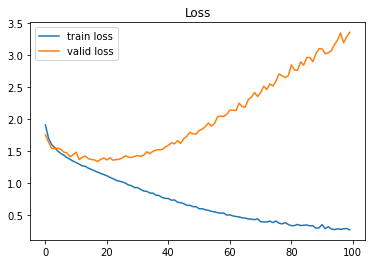

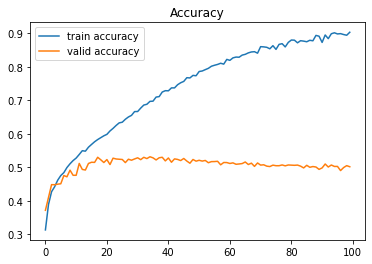

In [10]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work

請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練

請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢

(optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [11]:
# 啟用 GPU, 將 GPU 設定在有空檔的 GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # 設定 smi 看到的 GPU ID 符合實際設定的順序 (若一台機器有多張不同型號的卡時，會有此類問題)
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [12]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = tensorflow.keras.datasets.cifar10.load_data()

In [ ]:
"""Code Here
資料前處理
"""

In [14]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
"""Code Here
建立神經網路
"""

In [15]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [18]:
optimizer = tensorflow.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [19]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 36us/sample - loss: 1.9413 - accuracy: 0.2976 - val_loss: 1.7728 - val_accuracy: 0.3631
Epoch 2/100
50000/50000 [==============================] - 1s 30us/sample - loss: 1.7059 - accuracy: 0.3870 - val_loss: 1.6551 - val_accuracy: 0.4092
Epoch 3/100
50000/50000 [==============================] - 2s 31us/sample - loss: 1.6167 - accuracy: 0.4215 - val_loss: 1.5939 - val_accuracy: 0.4235
Epoch 4/100
50000/50000 [==============================] - 1s 29us/sample - loss: 1.5593 - accuracy: 0.4431 - val_loss: 1.5679 - val_accuracy: 0.4349
Epoch 5/100
50000/50000 [==============================] - 1s 30us/sample - loss: 1.5056 - accuracy: 0.4624 - val_loss: 1.5072 - val_accuracy: 0.4625
Epoch 6/100
50000/50000 [==============================] - 1s 30us/sample - loss: 1.4670 - accuracy: 0.4764 - val_loss: 1.4787 - val_accuracy: 0.4683
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5744 - accuracy: 0.7956 - val_loss: 1.9441 - val_accuracy: 0.5111
Epoch 56/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5690 - accuracy: 0.7981 - val_loss: 1.9422 - val_accuracy: 0.5089
Epoch 57/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5638 - accuracy: 0.7999 - val_loss: 2.0185 - val_accuracy: 0.5078
Epoch 58/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5458 - accuracy: 0.8060 - val_loss: 2.0380 - val_accuracy: 0.5038
Epoch 59/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5438 - accuracy: 0.8068 - val_loss: 2.0317 - val_accuracy: 0.5063
Epoch 60/100
50000/50000 [==============================] - 1s 30us/sample - loss: 0.5319 - accuracy: 0.8116 - val_loss: 2.0817 - val_accuracy: 0.5055
Epoch 61/100
50000/50000 [==============================] - 1s 29us/sample - loss: 0.5237 - ac

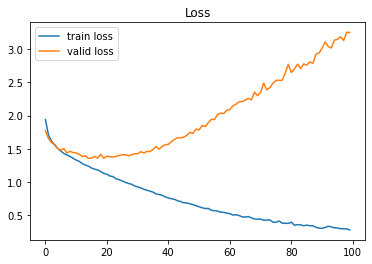

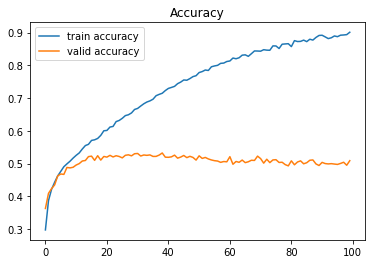

In [20]:
# 訓練模型並檢視驗證集的結果
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()